<div style="display: flex; align-items: center;">
    <img src="./img/python-stats.webp" alt="Logo" width="100" style="margin-right: 10px;"/> 
    <h1 style="margin: 0;">Arboles de decision</h1>
</div>

---

**Autor:** Cristiam Loaiza  
**Fecha:** 20 de octubre de 2024  
**Propósito:** Análisis de Datos usando Python y Herramientas Avanzadas

Los árboles de decisión son modelos predictivos basados en reglas binarias (sí/no) que permiten clasificar las observaciones según sus atributos, facilitando así la predicción del valor de la variable objetivo.

En muchos métodos predictivos, se generan modelos globales en los que una sola ecuación se aplica a todo el conjunto de datos. Sin embargo, cuando se trabaja con múltiples predictores que interactúan de manera compleja y no lineal, resulta complicado encontrar un modelo global que capture adecuadamente estas relaciones. Los métodos estadísticos y de machine learning basados en árboles pertenecen a un conjunto de técnicas supervisadas no paramétricas que dividen el espacio de los predictores en regiones más simples, donde es más fácil gestionar estas interacciones. Esta capacidad de segmentar el espacio es una de las principales fortalezas de los árboles de decisión.

Gracias a su versatilidad y efectividad en diversos problemas, los métodos basados en árboles se han posicionado como herramientas clave en el ámbito predictivo.

### Ventajas

- Los árboles son fáciles de interpretar aun cuando las relaciones entre predictores son complejas.
- Los modelos basados en un solo árbol (no es el caso de random forest o boosting) se pueden representar gráficamente incluso cuando el número de predictores es mayor a 3.
- Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin necesidad de crear variables dummy o aplicar one-hot encoding. En la práctica, esto depende de la implementación del algoritmo en cada librería.
- Al ser métodos no paramétricos, no requieren que se cumpla ninguna distribución específica.
- Generalmente necesitan menos limpieza y preprocesamiento de datos en comparación con otros métodos de aprendizaje estadístico (por ejemplo, no requieren estandarización).
- No son muy influenciados por valores atípicos (outliers).
- Si algún valor de un predictor no está disponible para una observación, es posible realizar una predicción utilizando las observaciones en el último nodo alcanzado, aunque la precisión pueda reducirse.
- Son muy útiles para la exploración de datos, permitiendo identificar rápidamente las variables (predictores) más importantes.
- Pueden seleccionar predictores de manera automática.
- Son aplicables tanto a problemas de regresión como de clasificación.

### Desventajas

- La capacidad predictiva de los modelos basados en un único árbol es considerablemente inferior a la de otros modelos, debido a su tendencia al overfitting y alta varianza. Sin embargo, técnicas más avanzadas como bagging, random forest y boosting abordan y mejoran este problema.
- Son sensibles a datos de entrenamiento desbalanceados, donde una clase domina sobre las demás.
- Al trabajar con predictores continuos, pierden parte de la información al categorizarlos durante la división de los nodos.
- La construcción de las ramificaciones de los árboles se basa en el algoritmo de *recursive binary splitting*, que evalúa las posibles divisiones de cada predictor según una medida determinada (RSS, Gini, entropía, etc.). Los predictores continuos, por azar, tienen mayor probabilidad de contener puntos de corte óptimos, lo que puede favorecerlos en la construcción del árbol.
- No son capaces de extrapolar fuera del rango de valores de los predictores presentes en los datos de entrenamiento.


### Árboles de Decisión en Python

La implementación principal de árboles de decisión en Python se encuentra en la librería **scikit-learn**, mediante las clases `DecisionTreeClassifier` y `DecisionTreeRegressor`. 

Una característica importante a tener en cuenta, especialmente para quienes han utilizado otras implementaciones, es que en **scikit-learn** es necesario convertir las variables categóricas en variables dummy (one-hot encoding) antes de utilizarlas.


### Árboles de regresion

Los árboles de regresión son un tipo de modelo de predicción utilizado cuando la variable objetivo es continua. Durante el proceso de entrenamiento, las observaciones se dividen a través de bifurcaciones (nodos), formando la estructura del árbol hasta llegar a los nodos terminales. 

Para realizar una predicción con una nueva observación, se recorre el árbol según los valores de sus predictores hasta alcanzar un nodo terminal. La predicción del modelo corresponde al promedio de los valores de la variable objetivo de las observaciones de entrenamiento contenidas en ese nodo terminal.


### Árboles de clasificación


Los **árboles de clasificación** son un subtipo de árboles de decisión diseñados para predecir una **variable respuesta categórica**, es decir, cuando la salida es una clase o categoría en lugar de un valor numérico continuo (como ocurre en los árboles de regresión).

#### Funcionamiento

1. **División del espacio**:  
   En cada nodo del árbol, se selecciona una característica (predictor) y un punto de corte que mejor separa las clases, utilizando métricas de calidad como:
   - **Índice de Gini**: mide la pureza de las clases en cada nodo.
   - **Entropía**: mide la cantidad de desorden o incertidumbre en las clases.

2. **Clasificación**:  
   Para clasificar una nueva observación, esta recorre el árbol siguiendo las reglas definidas en los nodos (por ejemplo, decisiones basadas en sí/no o en valores específicos) hasta llegar a un nodo terminal.

3. **Predicción**:  
   El nodo terminal al que se llega contiene una clase predominante, y esa clase es asignada como la predicción para la observación.

#### Ejemplo

Si queremos predecir si una fruta es una manzana o una naranja basándonos en atributos como color y tamaño, el árbol de clasificación funcionará de la siguiente manera:

- Si el color es **naranja**, es probable que sea una naranja.
- Si el color es **verde** y el tamaño es pequeño, es más probable que sea una manzana.



--- 

### Ejemplos

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

#### Datos: Boston Housing Dataset

El conjunto de datos **Boston**, disponible en la librería `scikit-learn`, contiene información sobre los precios de viviendas en la ciudad de Boston, así como datos socioeconómicos de los barrios donde se encuentran. El objetivo es ajustar un modelo de regresión que permita predecir el precio medio de una vivienda (**MEDV**) en función de las variables disponibles.

#### Resumen del Dataset

- **Número de instancias**: 506  
- **Número de atributos**: 13 predictivos (numéricos/categóricos). El atributo 14 (**MEDV**) es usualmente el objetivo a predecir.  
- **Valores faltantes**: Ninguno  

## Información de los Atributos (en orden)

1. **CRIM**: Tasa de criminalidad per cápita por localidad.  
2. **ZN**: Proporción de terreno residencial para lotes mayores a 25,000 pies cuadrados.  
3. **INDUS**: Proporción de acres de negocios no minoristas por localidad.  
4. **CHAS**: Variable dummy del río Charles (1 si la zona limita con el río; 0 en caso contrario).  
5. **NOX**: Concentración de óxidos nítricos (partes por 10 millones).  
6. **RM**: Promedio de número de habitaciones por vivienda.  
7. **AGE**: Proporción de unidades ocupadas por propietarios construidas antes de 1940.  
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.  
9. **RAD**: Índice de accesibilidad a carreteras radiales.  
10. **TAX**: Tasa de impuesto total sobre propiedades por $10,000.  
11. **PTRATIO**: Relación alumnos-profesor por localidad.  
12. **B**: \( 1000(Bk - 0.63)^2 \), donde \( Bk \) es la proporción de población negra por localidad.  
13. **LSTAT**: Porcentaje de población con menor estatus socioeconómico.  
14. **MEDV**: Valor mediano de las viviendas ocupadas por sus propietarios (en miles de dólares).

#### Origen del Dataset

- **Creador**: Harrison, D. y Rubinfeld, D.L.  
- **Fuente**: Este es un duplicado del dataset de UCI Machine Learning.  
  [Enlace al dataset original](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)


In [2]:
## load dataset housing boston
path = 'datasets/housing.csv'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
          'TAX','PTRATIO','B', 'LSTAT', 'MEDV']

data = pd.read_csv(path, names=columns, decimal='.', sep='\s+', skiprows=1)
data.head()

<>:6: SyntaxWarning: invalid escape sequence '\s'


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [3]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "MEDV"),
                                        data['MEDV'],
                                        random_state = 123
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 8


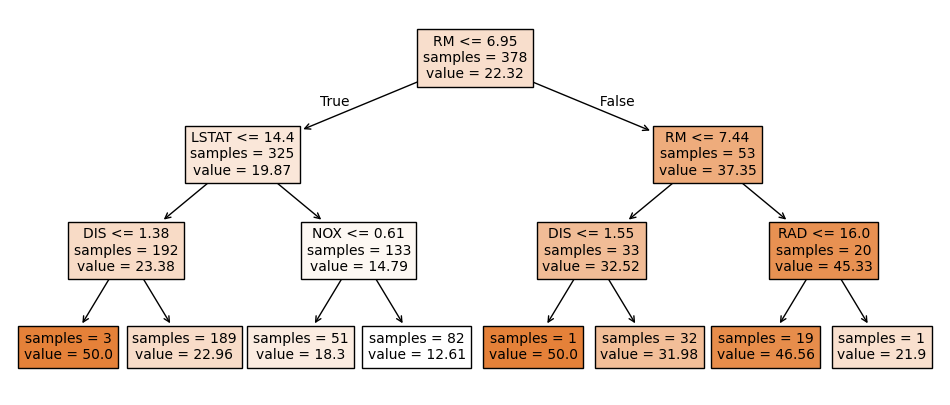

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))

# Mostrar información del árbol
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

# Graficar el árbol
plot = plot_tree(
    decision_tree=modelo,
    feature_names=data.drop(columns="MEDV").columns,  # Nombres de las características
    filled=True,          # Colores según la importancia
    impurity=False,       # No mostrar impureza
    fontsize=10,          # Tamaño de fuente
    precision=2,          # Precisión numérica
    ax=ax                 # Eje donde graficar
)

In [5]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(data.drop(columns = "MEDV").columns)
               )
print(texto_modelo)

|--- RM <= 6.95
|   |--- LSTAT <= 14.40
|   |   |--- DIS <= 1.38
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.38
|   |   |   |--- value: [22.96]
|   |--- LSTAT >  14.40
|   |   |--- NOX <= 0.61
|   |   |   |--- value: [18.30]
|   |   |--- NOX >  0.61
|   |   |   |--- value: [12.61]
|--- RM >  6.95
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.55
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.55
|   |   |   |--- value: [31.98]
|   |--- RM >  7.44
|   |   |--- RAD <= 16.00
|   |   |   |--- value: [46.56]
|   |   |--- RAD >  16.00
|   |   |   |--- value: [21.90]



In [6]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data.drop(columns = "MEDV").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,RM,0.618202
12,LSTAT,0.224264
7,DIS,0.095731
4,NOX,0.039445
8,RAD,0.022357
3,CHAS,0.000000
2,INDUS,0.000000
1,ZN,0.000000
0,CRIM,0.000000
6,AGE,0.000000


Text(0.5, 1.0, 'Error de validacion cruzada vs hiperparámetro ccp_alpha')

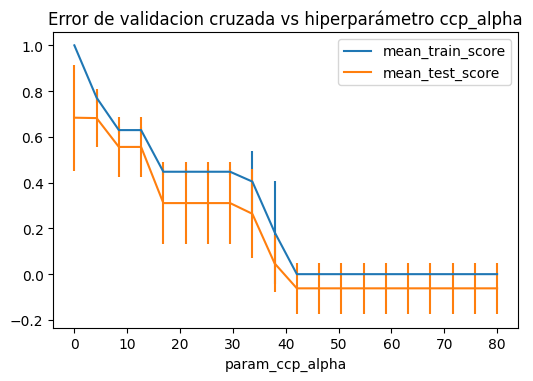

In [7]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha")

In [8]:
grid.best_params_

{'ccp_alpha': np.float64(0.0)}

Profundidad del árbol: 19
Número de nodos terminales: 356


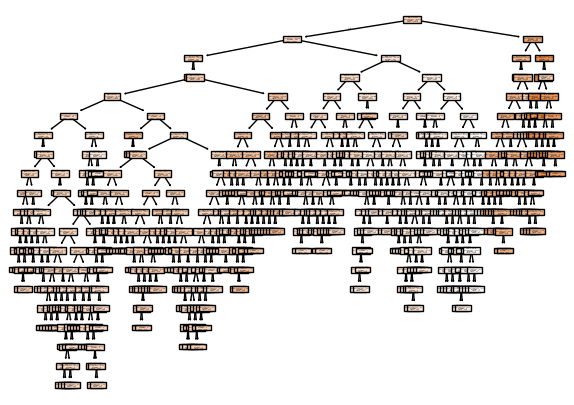

In [13]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = data.drop(columns="MEDV").columns,
            filled        = True,
            class_names= True,
            impurity      = True,
            ax            = ax
       )


In [11]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
from sklearn.metrics import root_mean_squared_error

predicciones = modelo.predict(X = X_test)

rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.639174305572849


In [12]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = root_mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.305765390922369
